# Praproses 2
- Diskritisasi/<i>binning</i>
- </i>Scalling</i>
- <i>Principal Component Analysis</i><br>
-- <i>Feature Selection</i><br>
-- <i>Feature Extraction</i>

## 1. Diskritisasi/binning
Mengubah bilangan kontinyu menjadi diskrit atau kategorikal juga. misal Usia 1-5 diubah menjadi kategori balita, 6-15 menjadi anak-anak dan usia 16-22 menjadi remaja.

In [ ]:
usia = [12, 15, 7, 8, 40, 60]

usia_diskrit = ["anak_muda","anak_muda","bocil","bocil","dewasa","dewasa"]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("california_housing_test.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

In [3]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


pandas.qcut
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html

pandas.cut
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

In [4]:
pd.qcut(data['population'], q=4).value_counts()

(4.999, 780.0]        752
(1742.75, 11935.0]    750
(1155.0, 1742.75]     749
(780.0, 1155.0]       749
Name: population, dtype: int64

In [5]:
data['population']

0       1537.0
1        809.0
2       1484.0
3         49.0
4        850.0
         ...  
2995    1258.0
2996    3496.0
2997     693.0
2998      46.0
2999     753.0
Name: population, Length: 3000, dtype: float64

<AxesSubplot:>

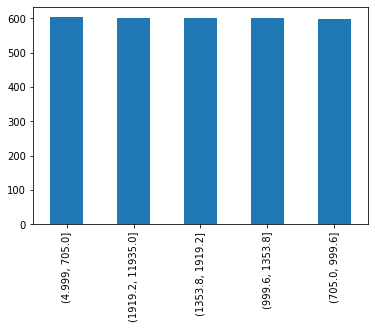

In [6]:
pd.qcut(data['population'], q=5).value_counts().plot(kind='bar')

In [7]:
label = ['sedikit',
         'banyak',
         'agak banyak',
         'biasa',
         'tidak sedikit']

label_populasi = pd.qcut(data['population'],
                        q = [0, 0.2, 0.4, 0.6, 0.8, 1],
                        labels = label)

label_populasi

0               biasa
1              banyak
2               biasa
3             sedikit
4              banyak
            ...      
2995      agak banyak
2996    tidak sedikit
2997          sedikit
2998          sedikit
2999           banyak
Name: population, Length: 3000, dtype: category
Categories (5, object): [sedikit < banyak < agak banyak < biasa < tidak sedikit]

<AxesSubplot:>

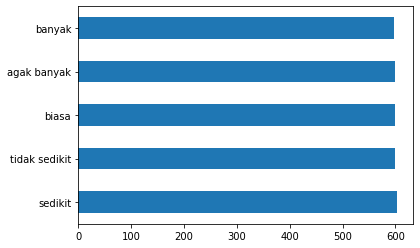

In [8]:
label_populasi.value_counts().plot(kind='barh')

In [9]:
data_umur_rumah = pd.cut(data['housing_median_age'], bins=5).value_counts()
data_umur_rumah

(31.6, 41.8]     817
(21.4, 31.6]     702
(11.2, 21.4]     699
(41.8, 52.0]     527
(0.949, 11.2]    255
Name: housing_median_age, dtype: int64

<AxesSubplot:>

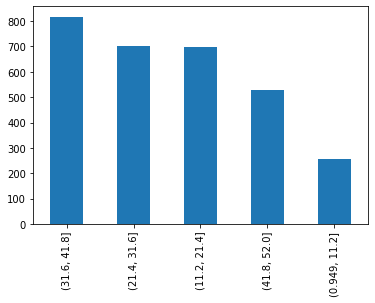

In [10]:
data_umur_rumah.plot(kind='bar')

In [11]:
label = ["lumayan tua",
        "biasa",
        "agak modern",
        "tua",
        "modern"]

label_umur_rumah = pd.cut(data['housing_median_age'],
                         bins = 5,
                         labels = label)

label_umur_rumah

0       agak modern
1            modern
2       agak modern
3       agak modern
4             biasa
           ...     
2995    agak modern
2996    agak modern
2997    lumayan tua
2998            tua
2999         modern
Name: housing_median_age, Length: 3000, dtype: category
Categories (5, object): [lumayan tua < biasa < agak modern < tua < modern]

<AxesSubplot:>

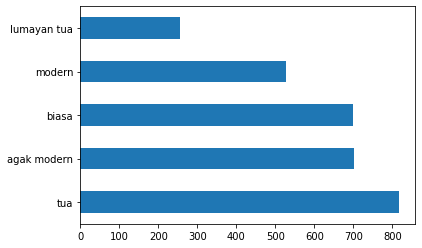

In [12]:
label_umur_rumah.value_counts().plot(kind='barh')

## 2. Scalling
Mengubah suatu data yang memiliki variasi besar sehingga memiliki skala yang tidak terlalu besar.

In [13]:
data = pd.read_csv("baru.csv", index_col="Item_Identifier")
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.300,0,0.016047,4,249.8092,9,4,1,0,1,3735.1380
DRC01,5.920,1,0.019278,14,48.2692,3,8,1,2,2,443.4228
FDN15,17.500,0,0.016760,10,141.6180,9,4,1,0,1,2097.2700
FDX07,19.200,1,0.000000,6,182.0950,0,3,1,2,0,732.3800
NCD19,8.930,0,0.000000,9,53.8614,1,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
FDF22,6.865,0,0.056783,13,214.5218,1,1,0,2,1,2778.3834
FDS36,8.380,1,0.046982,0,108.1570,7,5,1,1,1,549.2850
NCJ29,10.600,0,0.035186,8,85.1224,6,6,2,1,1,1193.1136


In [14]:
data.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,7.226681,140.992782,4.722281,3.790684,1.170832,1.112871,1.201220,2181.288914
std,4.226124,0.477836,0.051598,4.209990,62.275067,2.837201,2.730322,0.600327,0.812757,0.796459,1706.499616
min,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,0.000000,0.000000,0.000000,0.000000,33.290000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1.000000,1.000000,0.000000,1.000000,834.247400
50%,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,4.000000,1.000000,1.000000,1.000000,1794.331000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,6.000000,2.000000,2.000000,1.000000,3101.296400
max,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,8.000000,2.000000,2.000000,3.000000,13086.964800


<AxesSubplot:>

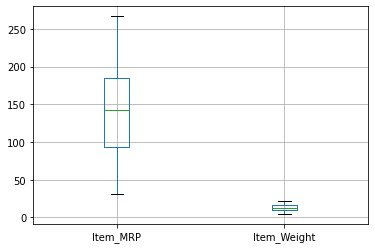

In [15]:
data.boxplot(['Item_MRP', 'Item_Weight'])

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(data[['Item_MRP']])
data['Item_MRP_Scalled'] = scaler.transform(data[['Item_MRP']])

In [19]:
data['Item_MRP_Scalled'].describe()

count    8523.000000
mean        0.465635
std         0.264327
min         0.000000
25%         0.265437
50%         0.474209
75%         0.655156
max         1.000000
Name: Item_MRP_Scalled, dtype: float64

<AxesSubplot:>

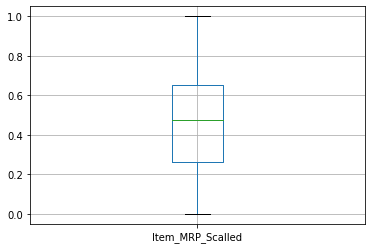

In [20]:
data.boxplot(['Item_MRP_Scalled'])

In [21]:
scaler.fit(data[['Item_Weight']])
data['Item_Weight_Scalled'] = scaler.transform(data[['Item_Weight']])

In [22]:
data['Item_Weight_Scalled'].describe()

count    8523.000000
mean        0.494352
std         0.251630
min         0.000000
25%         0.283120
50%         0.494352
75%         0.681453
max         1.000000
Name: Item_Weight_Scalled, dtype: float64

<AxesSubplot:>

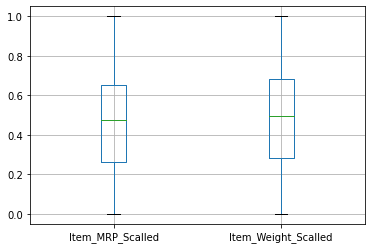

In [23]:
data.boxplot(['Item_MRP_Scalled', 'Item_Weight_Scalled'])

In [24]:
# nilai min == 0
# nilai max == 200

awal = np.array([[25, 50, 150, 200, 75]])

In [25]:
# nilai min baru == 0
# nilai max baru == 1

(awal-0)*(1-0)/(200-0)+0

array([[0.125, 0.25 , 0.75 , 1.   , 0.375]])

## 3.1 Feature Selection
Tujuannya adalah untuk memilih fitur yang "berpengaruh" pada <i>dataset</i>

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [27]:
bmsx = np.array([data["Item_Weight"],
                data["Item_Fat_Content"],
                data["Item_Visibility"],
                data['Item_MRP'],
                data["Outlet_Size"]])
bmsx.shape

(5, 8523)

In [28]:
bmsx

array([[9.30000000e+00, 5.92000000e+00, 1.75000000e+01, ...,
        1.06000000e+01, 7.21000000e+00, 1.48000000e+01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.60473010e-02, 1.92782160e-02, 1.67600750e-02, ...,
        3.51862710e-02, 1.45220646e-01, 4.48782800e-02],
       [2.49809200e+02, 4.82692000e+01, 1.41618000e+02, ...,
        8.51224000e+01, 1.03133200e+02, 7.54670000e+01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        2.00000000e+00, 1.00000000e+00, 2.00000000e+00]])

In [29]:
bmsxt=bmsx.transpose()
bmsxt.shape

(8523, 5)

In [30]:
bms_std=StandardScaler().fit_transform(bmsxt)
bms_std

array([[-0.84187169, -0.73814723, -0.97073217,  1.74745381, -0.28458121],
       [-1.64170589,  1.35474328, -0.90811123, -1.48902325, -0.28458121],
       [ 1.09855449, -0.73814723, -0.95691733,  0.01004021, -0.28458121],
       ...,
       [-0.53424315, -0.73814723, -0.59978449, -0.89720755,  1.38127431],
       [-1.33644372,  1.35474328,  1.53287976, -0.60797692, -0.28458121],
       [ 0.45963367, -0.73814723, -0.41193591, -1.05226104,  1.38127431]])

In [31]:
pcafs=PCA(n_components=0.70,whiten=True)
bmsfs_pca=pcafs.fit_transform(bms_std)

In [32]:
print('Original number of features:', bms_std.shape[1])
print('Reduced numer of features:', bmsfs_pca.shape[1])

Original number of features: 5
Reduced numer of features: 4


In [33]:
datafs_pca=pd.DataFrame(bmsfs_pca, columns=["PC1","PC2","PC3","PC4"])
datafs_pca

,PC1,PC2,PC3,PC4
0,-0.905339,0.532946,0.467277,-2.012024
1,0.189393,-2.464418,0.546322,-0.041835
2,-1.323776,0.658592,-0.378170,0.422434
3,-0.800139,0.934151,1.459296,0.865834
4,-1.932469,-2.094947,-0.119546,0.026075
...,...,...,...,...
8518,-1.126692,-0.601088,1.016007,-1.632324
8519,0.397127,-1.397350,0.942667,-0.083106
8520,0.171736,-0.471014,-1.595302,-0.433513
8521,1.708602,-1.411307,0.819933,0.160984


## <i>3.2 Feature Extraction</i>
Tujuannya adalah menggabungkan/mengelompokkan feature menjadi beberapa feature saja.

In [34]:
from sklearn import decomposition

In [35]:
pcafe=decomposition.PCA(n_components=3)
bmsfe_pca=pcafe.fit_transform(bms_std)

In [36]:
print('Original number of features:', bms_std.shape[1])
print('Reduced numer of features:', bmsfe_pca.shape[1])

Original number of features: 5
Reduced numer of features: 3


In [37]:
datafe_pca=pd.DataFrame(bmsfe_pca, columns=["PC1","PC2", "PC3"])
datafe_pca

,PC1,PC2,PC3
0,-0.944736,0.539700,0.467727
1,0.197634,-2.495648,0.546847
2,-1.381382,0.666938,-0.378534
3,-0.834957,0.945989,1.460699
4,-2.016563,-2.121495,-0.119661
...,...,...,...
8518,-1.175721,-0.608705,1.016983
8519,0.414409,-1.415057,0.943573
8520,0.179209,-0.476983,-1.596835
8521,1.782954,-1.429192,0.820721
